In [7]:
import pandas as pd
import numpy as np
import scipy as sp

import seaborn as sbn
import matplotlib.pyplot as plt

from scipy.stats import skewtest, levene

With the correlation of between two different datasets we can say wether they are correlated. Its value goes from -1 to 1 and the closer to those is the data then the stronger is the correlation, a correlation of 0 means that there is not correlation between the datasets.

We can use different proofs to test the correlation:

    -Pearson correlation

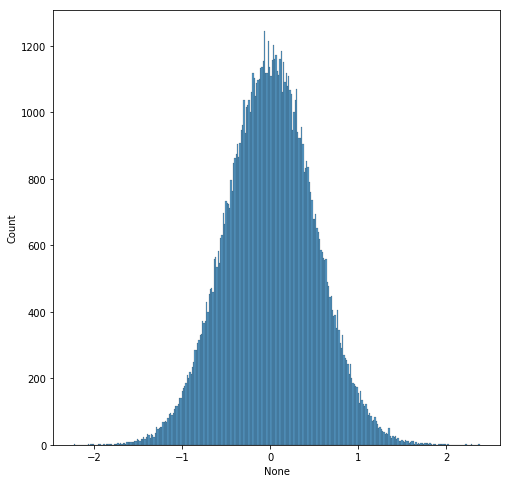

In [25]:
#generating a normal distributed sample
#np.random.seed(22)
normal_random = np.random.normal(loc=0, scale=0.5, size=100000)

#ploting
fig, ax = plt.subplots(figsize=(8, 8))
sbn.histplot(data=normal_random, bins=int(np.sqrt(len(normal_random))) )

In [27]:
#we can test if it is a normal distribution by using a skewtest
#skewtest tests whether the skew is different from the normal distribution.This function tests the null hypothesis
#that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution.
#https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5 some tests to test the normallity of the function
print(skewtest(a=normal_random))
print(sp.stats.skew(a=normal_random))
print(sp.stats.normaltest(a=normal_random))

SkewtestResult(statistic=0.6051959461962778, pvalue=0.5450488090345154)
0.004687501887412269
NormaltestResult(statistic=4.7430793248436505, pvalue=0.09333690826065248)


### Dataset

In [28]:
archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [29]:
df.columns = df.columns.str.replace("-", "_")

/home/brayan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


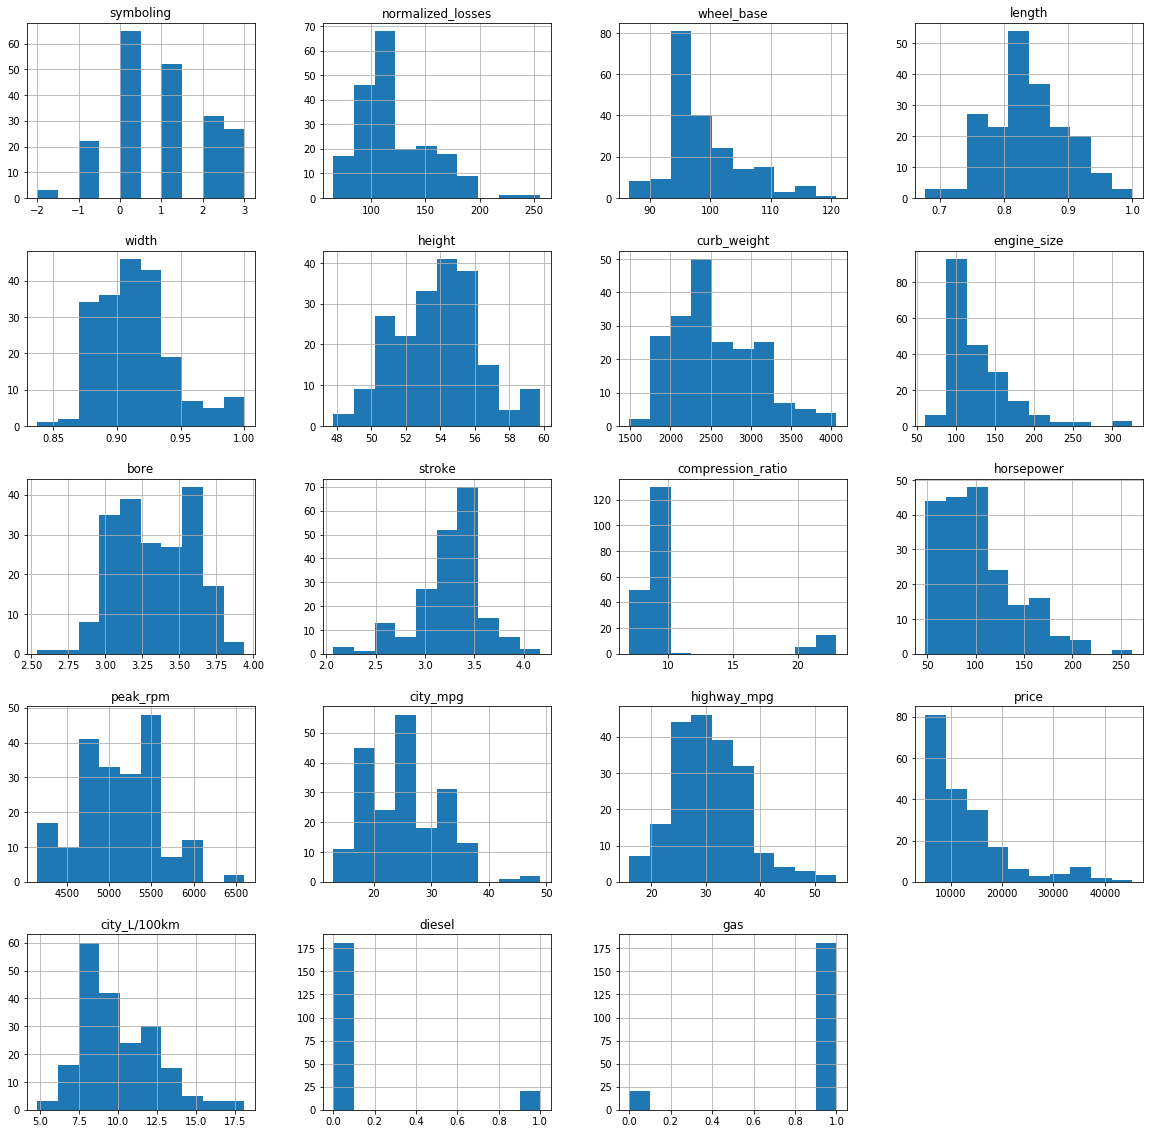

In [31]:
#lets see how the different variables from the cars dataset are distributed
fig, ax = plt.subplots(figsize=(20, 20))
hists = df.hist(ax=ax)

In [75]:
#lets test the normallity of some variables
print(skewtest(a=df.price))
print(skewtest(a=df.horsepower))
print(skewtest(a=df.engine_size))
print(skewtest(a=df.bore))

SkewtestResult(statistic=7.639137730516152, pvalue=2.186812829722033e-14)
SkewtestResult(statistic=5.6280373959751575, pvalue=1.8227157885260026e-08)
SkewtestResult(statistic=8.058856418726215, pvalue=7.701148913242647e-16)
SkewtestResult(statistic=-0.19444018694922788, pvalue=0.8458312256893494)


In [32]:
#now lets test the variances between some samples
#for this we can use the levene test. This one tests the null hypothesis that the input samples come from populations with equal variance
# A small p-value means that there is stronger evidence in favor of the alternative hypothesis.
print(levene(df.price, df.bore))
print(levene(df.price, df.engine_size))
print(levene(df.price, df.horsepower))

LeveneResult(statistic=142.29578788125494, pvalue=2.837441642513229e-28)
LeveneResult(statistic=140.81734743196424, pvalue=4.916938115048979e-28)
LeveneResult(statistic=140.82571974648306, pvalue=4.901632315667983e-28)


In [40]:
#now lets see the corr matrix by using different methods
#full covariance matrix
df.corr().sort_values(by="price", ascending=False)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,diesel,gas
price,-0.082391,0.133999,0.584642,0.690628,0.751265,0.135486,0.834415,0.872335,0.543155,0.082310,0.071107,0.809575,-0.101616,-0.686571,-0.704692,1.000000,0.789898,0.110326,-0.110326
engine_size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
curb_weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
horsepower,0.075819,0.217299,0.371147,0.579821,0.615077,-0.087027,0.757976,0.822676,0.566936,0.098462,-0.214514,1.000000,0.107885,-0.822214,-0.804575,0.809575,0.889488,-0.169053,0.169053
city_L/100km,0.066171,0.238567,0.476153,0.657373,0.673363,0.003811,0.785353,0.745059,0.554610,0.037300,-0.299372,0.889488,0.115830,-0.949713,-0.930028,0.789898,1.000000,-0.241282,0.241282
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
wheel_base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578


In [41]:
#the correlation with the price by using several methods
df.corr()["price"].sort_values(ascending=False)

price                1.000000
engine_size          0.872335
curb_weight          0.834415
horsepower           0.809575
city_L/100km         0.789898
width                0.751265
length               0.690628
wheel_base           0.584642
bore                 0.543155
height               0.135486
normalized_losses    0.133999
diesel               0.110326
stroke               0.082310
compression_ratio    0.071107
symboling           -0.082391
peak_rpm            -0.101616
gas                 -0.110326
city_mpg            -0.686571
highway_mpg         -0.704692
Name: price, dtype: float64

In [42]:
df.corr(method="kendall")["price"].sort_values(ascending=False)

price                1.000000
curb_weight          0.744265
horsepower           0.664788
engine_size          0.661342
city_L/100km         0.661282
width                0.638911
length               0.636420
wheel_base           0.540313
bore                 0.489625
height               0.182387
normalized_losses    0.134911
diesel               0.118449
stroke               0.094153
peak_rpm            -0.048705
symboling           -0.104866
gas                 -0.118449
compression_ratio   -0.136957
highway_mpg         -0.651805
city_mpg            -0.661282
Name: price, dtype: float64

In [43]:
df.corr(method="spearman")["price"].sort_values(ascending=False)

price                1.000000
curb_weight          0.913767
horsepower           0.849142
city_L/100km         0.831284
engine_size          0.828417
width                0.812097
length               0.810331
wheel_base           0.681790
bore                 0.645943
height               0.263806
normalized_losses    0.202034
diesel               0.144657
stroke               0.117582
peak_rpm            -0.081912
symboling           -0.142683
gas                 -0.144657
compression_ratio   -0.177579
highway_mpg         -0.827265
city_mpg            -0.831284
Name: price, dtype: float64

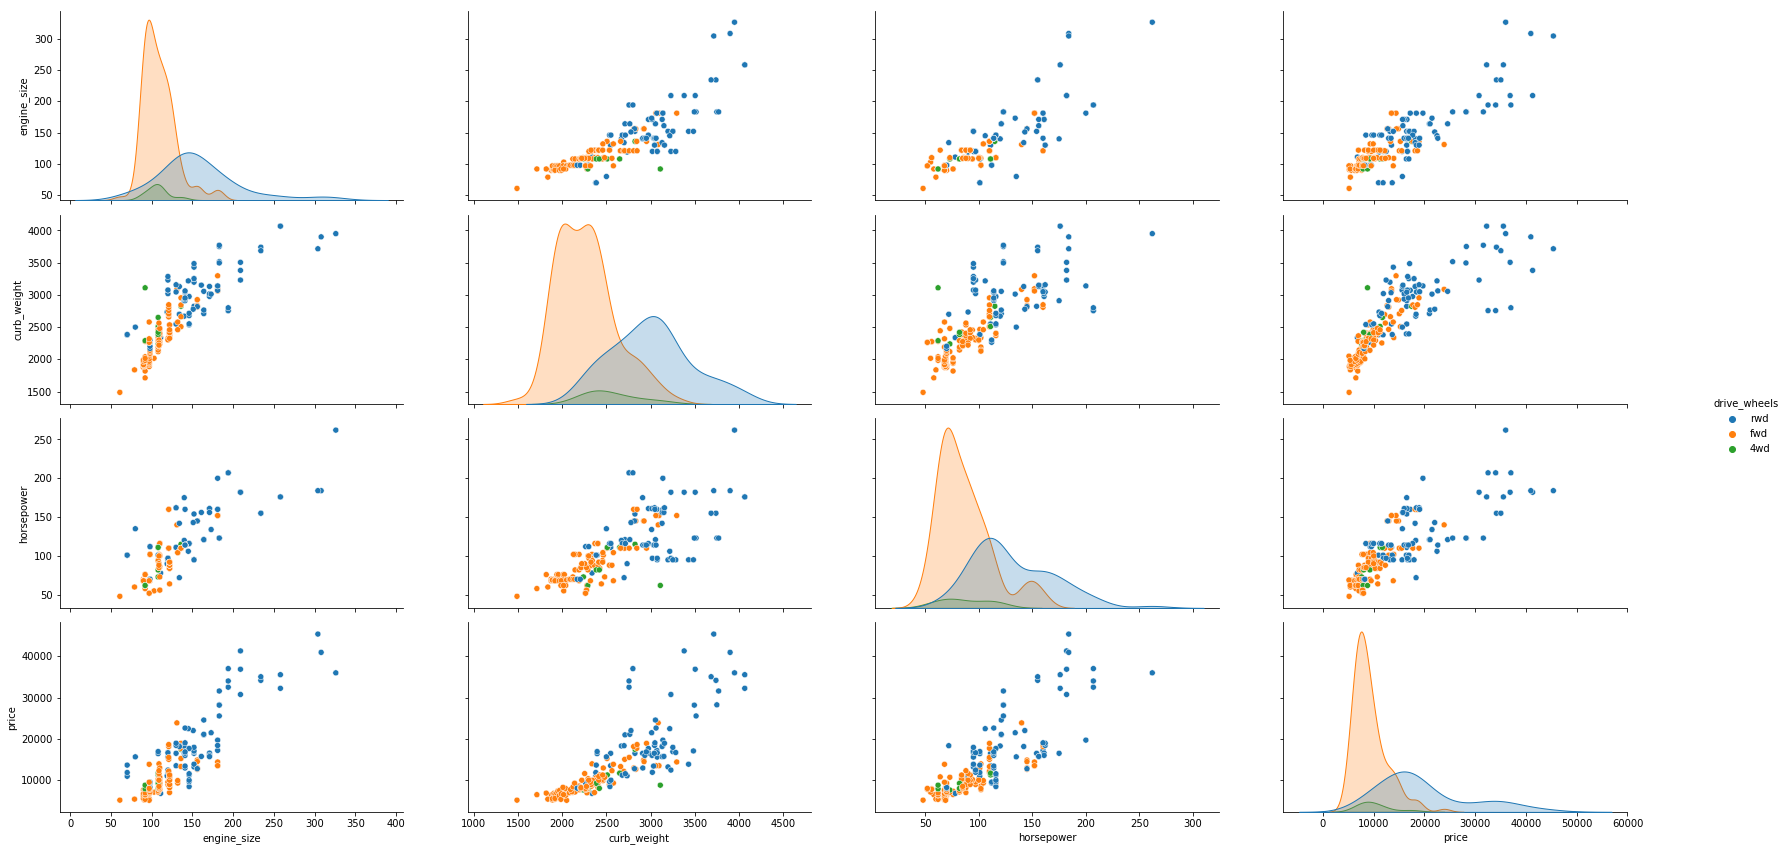

In [44]:
#from the former results we can see that no matter the method we use to compute the correlation among the variables 
#the engine_size, the horsepower and the curb_weight always seem to be a good predictor for the price of the car.
#we can make a scatter matrix to see the relation between this variables in a plot
sbn.pairplot(data=df, hue="drive_wheels", vars=["engine_size","curb_weight","horsepower","price"], height=3, aspect=2)

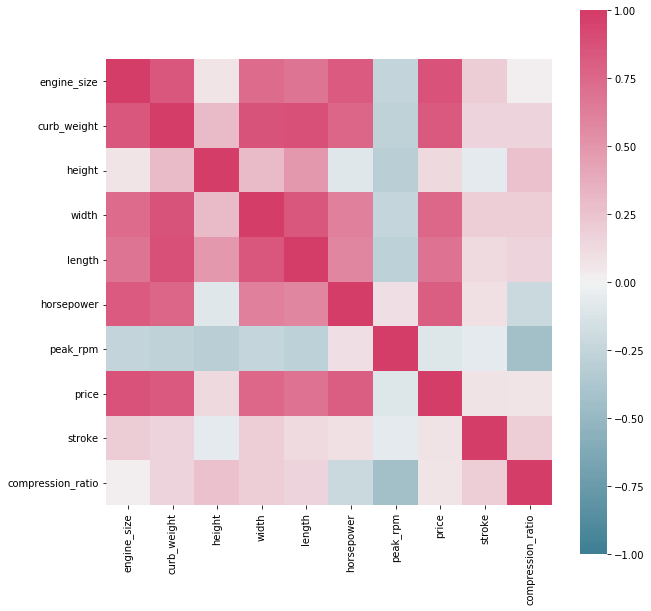

In [46]:
#we can even use a heatmap to see the correlations
df_corr = df[['engine_size','curb_weight','height','width','length','horsepower','peak_rpm','price','stroke','compression_ratio']].corr()
fig, ax = plt.subplots(figsize=(10,10))
sbn.heatmap(data=df_corr, vmin=-1, vmax=1, center=0, square=True, cmap=sbn.diverging_palette(220, 0, n=200))